In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
original_df=df.copy()
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#categorical columns
cat_col=[col for col in df.columns if df[col].dtype=='object']
print('Categorical Columns:',cat_col)

#Numerical Columns
num_col=[col for col in df.columns if df[col].dtype!='object']
print('Numerical Columns:',num_col)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
#prints total number of unique values 

df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
df_clean=df.drop(columns=['Name','Ticket','Sex','Embarked'])
df_clean

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN
887,888,1,1,19.0,0,0,30.0000,B42
888,889,0,3,NaN,1,2,23.4500,NaN
889,890,1,1,26.0,0,0,30.0000,C148


In [8]:
# print(df.isnull()) or print(df.isna())
# print(df.notnull())
# print(df.info())
# print(df.isnull().any())
# print(df.isnull().sum())
# print(df.isnull().sum().sum())

In [9]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [10]:
# #remove rows
# df_dropna_rows=df.dropna(inplace=True)

# df.shape

In [11]:
# #remove columns
# df_dropna_cols=df.dropna(axis=1,inplace=True)
# df.shape

In [12]:
from sklearn.impute import SimpleImputer

df_mean_impute=df.copy()
mean_imputer=SimpleImputer(strategy='mean')
df_mean_impute['Age']=mean_imputer.fit_transform(df_mean_impute[['Age']])

df_mean_impute['Age'].isnull().sum()

np.int64(0)

In [13]:
from sklearn.impute import SimpleImputer


df_impute=df.copy()
mode_imputer=SimpleImputer(strategy='mst_frequent')
df_impute[['Embarked']]=mode_imputer.fit_transform(df_impute[['Embarked']])

df_impute[['Embarked']].isnull().sum()

InvalidParameterError: The 'strategy' parameter of SimpleImputer must be a str among {'mean', 'constant', 'most_frequent', 'median'} or a callable. Got 'mst_frequent' instead.

In [ ]:
df_fill=df.copy()
df_fill.fillna(method='ffill',inplace=True)

df_fill.isnull().sum()

C:\Users\Sai Sidhartha Padhy\AppData\Local\Temp\ipykernel_8172\1491441403.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill.fillna(method='ffill',inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [ ]:
df_bfill=df.copy()
df_bfill.fillna(method='bfill',inplace=True)

df_bfill.isnull().sum()

C:\Users\Sai Sidhartha Padhy\AppData\Local\Temp\ipykernel_8172\811326936.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill.fillna(method='bfill',inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [ ]:
#Fill with custom value

df_custom=df.copy()
df_custom['Cabin'].fillna('Unknown',inplace=True)

df_custom['Cabin'].isnull().sum()

C:\Users\Sai Sidhartha Padhy\AppData\Local\Temp\ipykernel_8172\3918370158.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_custom['Cabin'].fillna('Unknown',inplace=True)


np.int64(0)

In [ ]:
df_clean=df.drop(columns=['Name','Ticket','Sex','Embarked','Cabin'])
df_clean

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
#categorical columns
cat_col=df.select_dtypes(include='object')
print('Categorical columns:',cat_col.columns.tolist())

#Numerical Columns
num_col=df.select_dtypes(include='number')
print('Numerical columns:',num_col.columns.tolist())

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


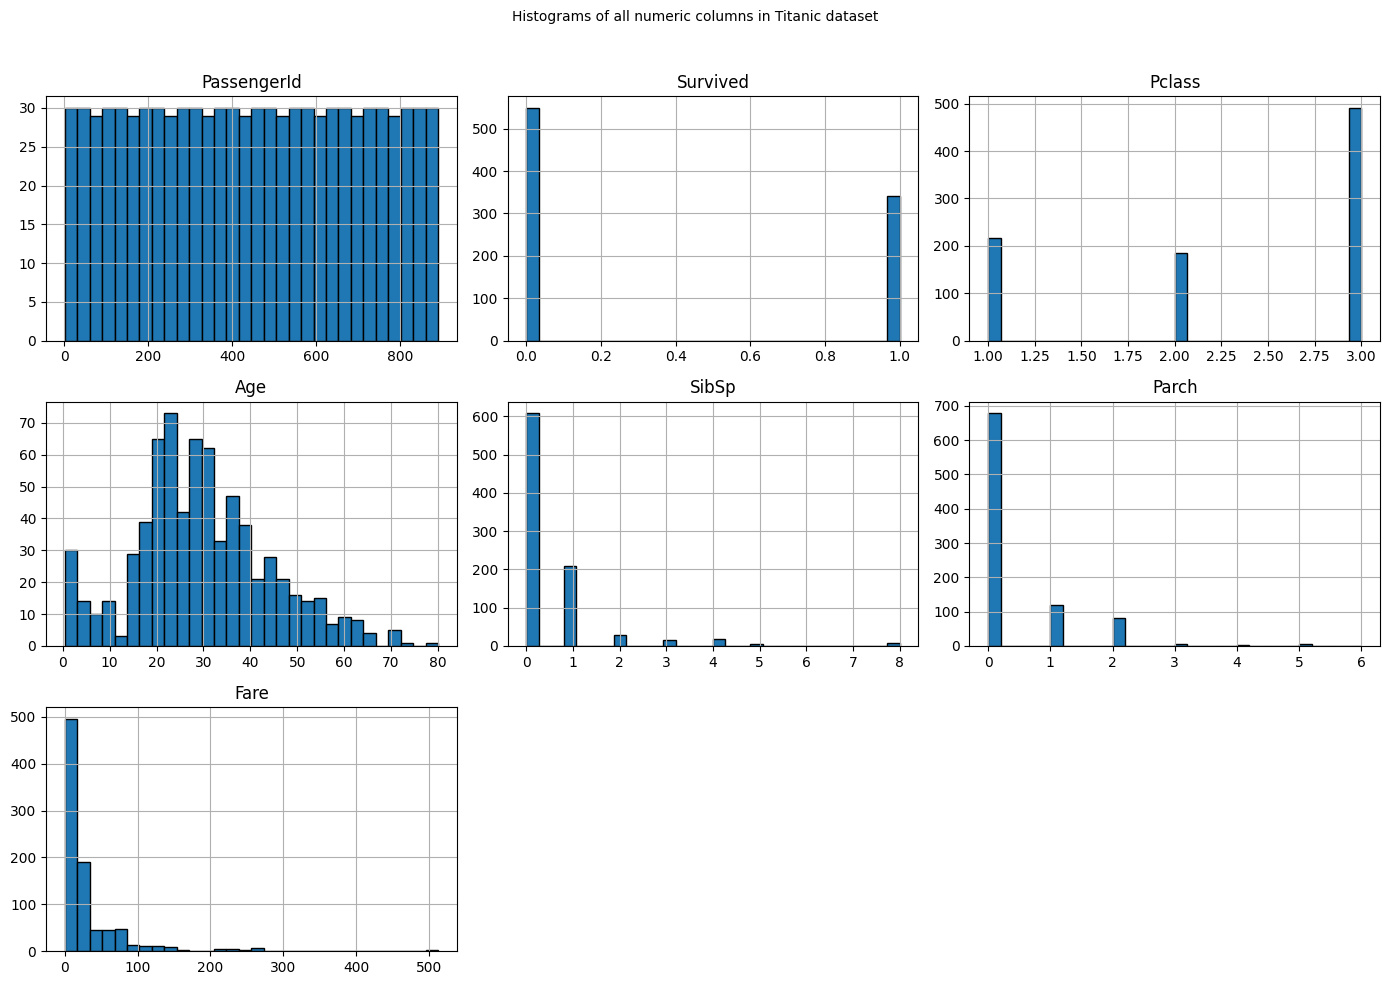

In [ ]:
num_col.hist(bins=30, figsize=(14,10), edgecolor='black')
plt.suptitle('Histograms of all numeric columns in Titanic dataset', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


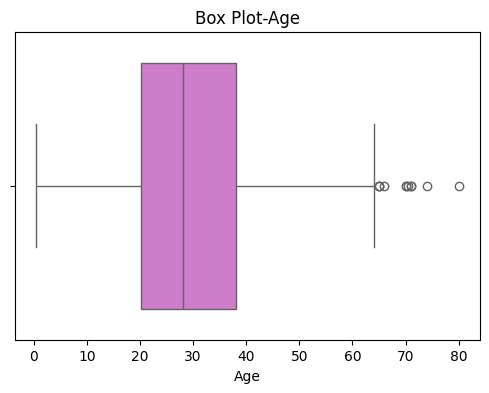

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'],color='orchid')
plt.title('Box Plot-Age')
plt.xlabel('Age')
plt.show()

In [ ]:
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print('Upper Boundary:',upper_boundary)
print('Lower Boundary',lower_boundary)

Upper Boundary: 73.27860964406094
Lower Boundary -13.880374349943303


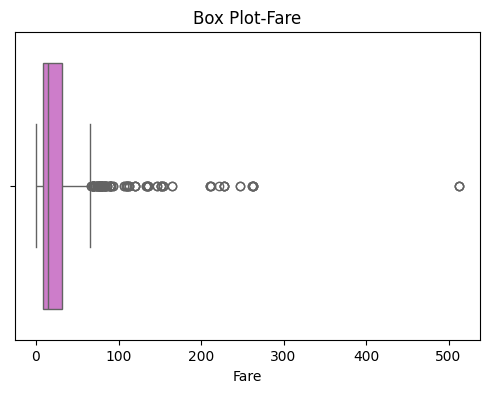

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'],color='orchid')
plt.title('Box Plot-Fare')
plt.xlabel('Fare')
plt.show()

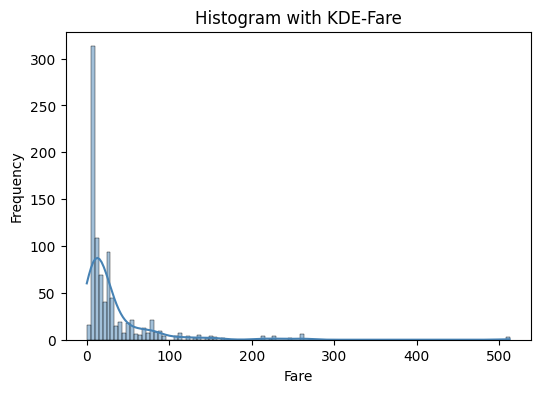

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'],kde=True,color='steelblue')
plt.title('Histogram with KDE-Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR



np.float64(23.0896)

In [ ]:
#Calculating the boundaries

lower_fence=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_fence=df['Fare'].quantile(0.75)+(IQR*1.5)
print('Lower Boundary:',lower_fence)
print('Upper Boundary:',upper_fence)


Lower Boundary: -26.724
Upper Boundary: 65.6344


In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print('Lower Boundary:',lower_bridge)
print('Upper Boundary:',upper_bridge)

Lower Boundary: -61.358399999999996
Upper Boundary 100.2688


In [ ]:

#Drop missing fare values
df=df[['Fare']].dropna()

#Calculate Z-score
df['Fare_z']=zscore(df['Fare'])

#Filter out outliers(Z-Score beyond 3)
df_filtered=df[(df['Fare_z']>= -3)&(df['Fare_z']<= 3)]

df_filtered

,Fare,Fare_z
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337
...,...,...
886,13.0000,-0.386671
887,30.0000,-0.044381
888,23.4500,-0.176263
889,30.0000,-0.044381


In [ ]:
df.sample(10)

,Fare,Fare_z
715,7.6500,-0.494391
502,7.6292,-0.494810
498,151.5500,2.402990
458,10.5000,-0.437007
400,7.9250,-0.488854
367,7.2292,-0.502864
468,7.7250,-0.492881
885,29.1250,-0.061999
60,7.2292,-0.502864
688,7.7958,-0.491456


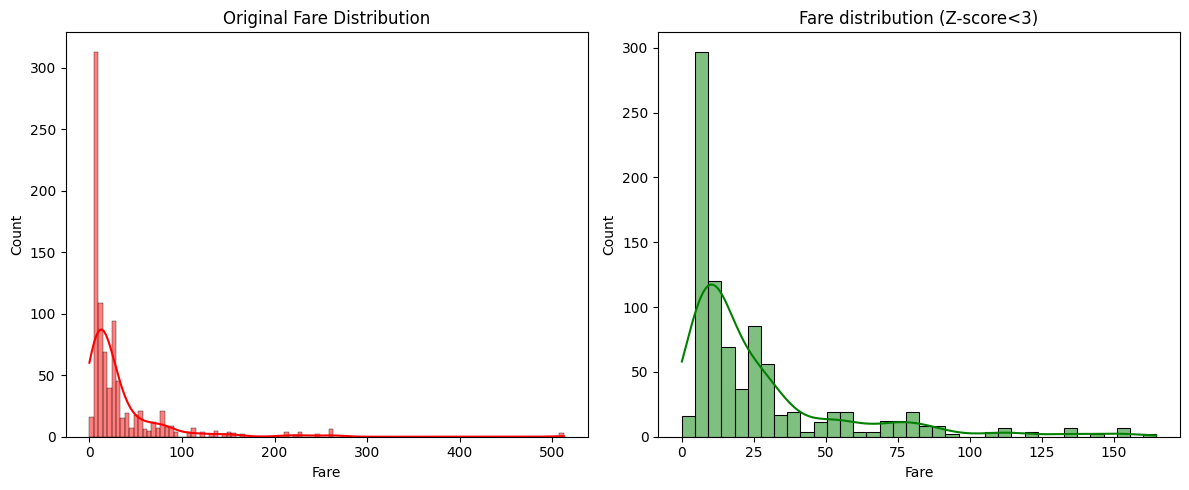

In [ ]:
plt.figure(figsize=(12,5))

#Before removing outliers

plt.subplot(1,2,1)
sns.histplot(df['Fare'],kde=True,color='red')
plt.title('Original Fare Distribution')

#After removing outliers

plt.subplot(1,2,2)
sns.histplot(df_filtered['Fare'],kde=True,color='green')
plt.title('Fare distribution (Z-score<3)')

plt.tight_layout()
plt.show()

In [ ]:
#Calculate Q1,Q3 and IQR

Q1=df['Fare'].quantile(0.25)

Q3=df['Fare'].quantile(0.75)

IQR=Q3-Q1

#Calculate bounds
lower_bound=Q1-3*IQR
upper_bound=Q3+3*IQR

#Filter out outliers
df_filtered=df[(df['Fare'] >=lower_bound)&(df['Fare']<=upper_bound)]

df_filtered


,Fare,Fare_z
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337
...,...,...
886,13.0000,-0.386671
887,30.0000,-0.044381
888,23.4500,-0.176263
889,30.0000,-0.044381


In [ ]:
median_fare=df_filtered['Fare'].median()
df['Fare_replaced']=df['Fare'].apply(
    lambda x:median_fare if x>upper_bound or x <lower_bound else x
)
df

,Fare,Fare_z,Fare_replaced
0,7.2500,-0.502445,7.2500
1,71.2833,0.786845,71.2833
2,7.9250,-0.488854,7.9250
3,53.1000,0.420730,53.1000
4,8.0500,-0.486337,8.0500
...,...,...,...
886,13.0000,-0.386671,13.0000
887,30.0000,-0.044381,30.0000
888,23.4500,-0.176263,23.4500
889,30.0000,-0.044381,30.0000
